# Esercitazione 8
L'esercitazione 8 richiede di implementare metodi Monte Carlo variazionali per valutare l'energia di ground state per una particella soggetta ad un potenziale unidimensionale $V(x)=x^4-\cfrac{5}{2}x^2$; in particolare, si richiede di calcolare i parametri $\mu$ e $\sigma$ della funzione d'onda della particella nel ground state attraverso un algoritmo di _Simulated Annealing_. 

## Esercizio 8.2

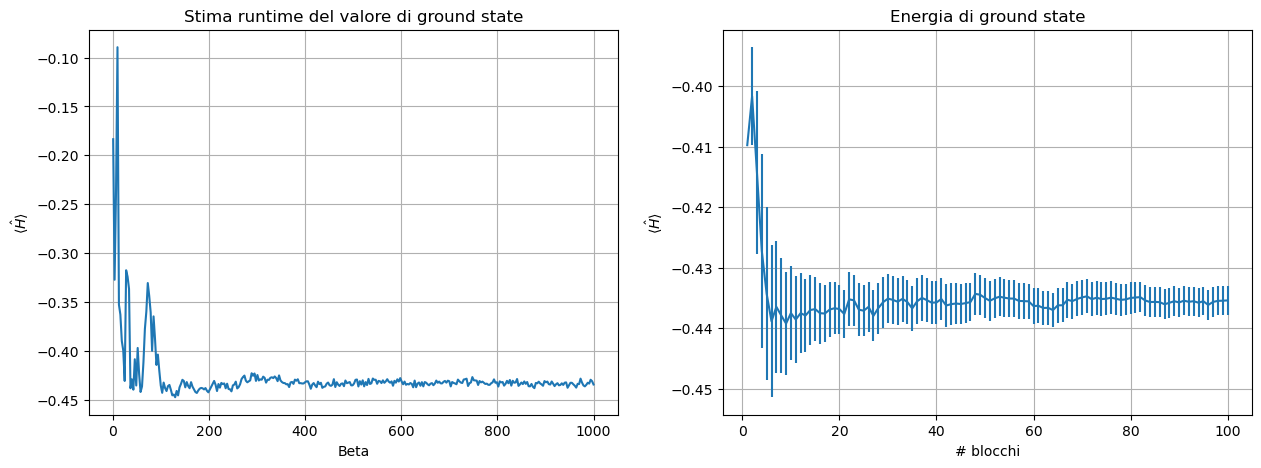

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
beta, ene = np.loadtxt("Beta.dat",usecols=(0,1), delimiter=',', unpack='true') 
x, sum, error = np.loadtxt("Energy.dat", usecols=(0,1,2), delimiter=',', unpack='true')


fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(beta, ene)
ax0.set_title('Stima runtime del valore di ground state')
ax0.set_ylabel(r'$\langle \hat{H} \rangle$')
ax0.set_xlabel('Beta')
ax0.grid()

ax1.set_title('Energia di ground state')
ax1.errorbar(x,sum,yerr=error)
ax1.set_ylabel(r'$\langle \hat{H} \rangle$')
ax1.set_xlabel('# blocchi')
ax1.grid(True)

plt.show()

Text(0.5, 1.0, '$\\mu$ and $\\sigma$ changes')

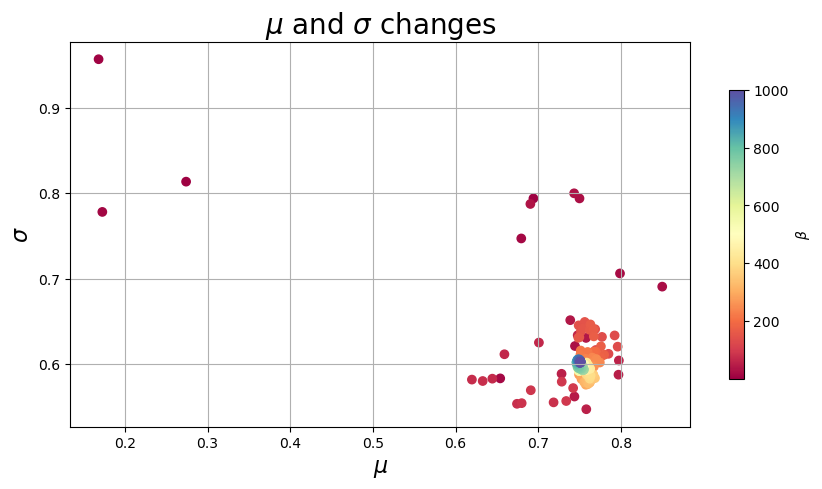

In [5]:
beta, mu, sigma= np.loadtxt("Parameters.dat", usecols=(0, 1, 2), unpack='true', delimiter=",")
fig, ax =plt.subplots(1,1,figsize=(10, 5))
plt.scatter(mu, sigma, c=beta, cmap='Spectral')
cbar=plt.colorbar(label=r"$\beta$", orientation="vertical",shrink=.75)
ax.set_xlabel(r'$\mu$', fontsize=16)
ax.set_ylabel(r'$\sigma$', fontsize=16)
ax.grid()
ax.set_title(r"$\mu$ and $\sigma$ changes", fontsize=20)